In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [5]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

<Axes: >

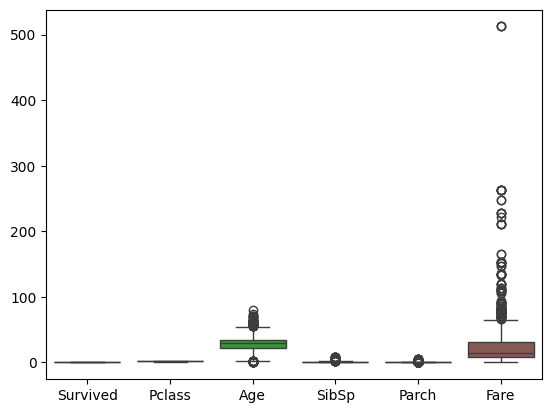

In [8]:
sns.boxplot(data)

In [9]:
columns=["Age","SibSp","Parch","Fare"]
for col in columns:
    q1=np.percentile(data[col],25)
    q3=np.percentile(data[col],75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    data.loc[data[col]>upper_bound,col]=upper_bound
    data.loc[data[col]<lower_bound,col]=lower_bound

C:\Users\DELL\AppData\Local\Temp\ipykernel_14464\4105336044.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col]>upper_bound,col]=upper_bound


<Axes: >

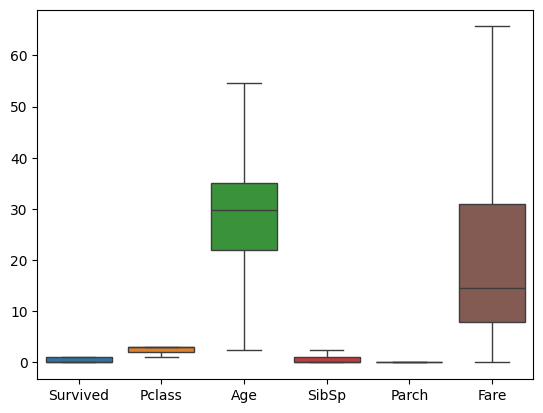

In [10]:
sns.boxplot(data)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
cat_col=data.select_dtypes(include="object")
cat_col

,Sex,Cabin,Embarked
0,male,B96 B98,S
1,female,C85,C
2,female,B96 B98,S
3,female,C123,S
4,male,B96 B98,S
...,...,...,...
886,male,B96 B98,S
887,female,B42,S
888,female,B96 B98,S
889,male,C148,C


In [17]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [13]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])
    data[col].astype('int64')

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
selector=SelectKBest(chi2,k=5)

In [18]:
X_new=selector.fit_transform(X,y)

In [19]:
X_new.shape

(891, 5)

In [21]:
from sklearn.model_selection import train_test_split
X_tarin, X_test,y_train,y_test=train_test_split(X_new,y,test_size=.2,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc=DecisionTreeClassifier()

In [26]:
dtc.fit(X_tarin, y_train)

DecisionTreeClassifier()

In [27]:
y_pred=dtc.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
print("Accuracy Score: ", accuracy_score(y_test,y_pred))

Accuracy Score:  0.7374301675977654


In [31]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [32]:
dtcl=DecisionTreeClassifier()

In [33]:
parms_dict={"max_depth":[None,5,10,15],
            "min_samples_split":[2,5,10],
            "min_samples_leaf":[1,2,4]}

In [34]:
grid_search=GridSearchCV(dtcl,parms_dict,cv=4,scoring="accuracy")

In [35]:
grid_search.fit(X_tarin,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [36]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [37]:
best_model=grid_search.best_estimator_

In [39]:
y_pred=best_model.predict(X_test)

In [40]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.7821229050279329


In [42]:
# Saving models
import joblib
joblib.dump(best_model,"decision_tree_model.joblib")

['decision_tree_model.joblib']

In [43]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc=RandomForestClassifier()

In [45]:
rfc.fit(X_tarin,y_train)

RandomForestClassifier()

In [46]:
y_pred=rfc.predict(X_test)

In [47]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.7877094972067039


In [50]:
#Hyperparameter tuning by using Randomsearchcv
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()

In [51]:
params_dict={"max_depth":[None,5,10,15],
             "min_samples_split":[2,5,10],
             "min_sample_leaf":[2,5,10]}

In [52]:
random_search=RandomizedSearchCV(rfc,parms_dict,cv=4, scoring='accuracy')

In [53]:
random_search.fit(X_tarin,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='accuracy')

In [54]:
print("Best hyperparamter : ",random_search.best_params_)

Best hyperparamter :  {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15}


In [55]:
best_rfc_model=random_search.best_estimator_

In [56]:
y_pred=best_rfc_model.predict(X_test)

In [57]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.8100558659217877


In [58]:
import pickle

In [59]:
with open("random_forest_model.pkl","wb") as file:
    pickle.dump(best_rfc_model,file)

In [61]:
# Support Vector Machine classifier
from sklearn.svm import SVC
svc=SVC()

In [62]:
svc.fit(X_tarin,y_train)

SVC()

In [63]:
y_pred=svc.predict(X_test)

In [64]:
print("Accuarcy Score :",accuracy_score(y_test,y_pred))

Accuarcy Score : 0.7094972067039106


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
svcm=SVC()

In [67]:
parms_dict={'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']}

In [70]:
grid_search=GridSearchCV(svcm,parms_dict,cv=4,scoring="accuracy")

In [71]:
grid_search.fit(X_tarin,y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [72]:
print("Best hyperparameter:",grid_search.best_params_)

Best hyperparameter: {'C': 100, 'kernel': 'rbf'}


In [73]:
best_svm_model=grid_search.best_estimator_

In [75]:
y_pred=best_svm_model.predict(X_test)

In [76]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.776536312849162
